In [1]:
%pip install pandas seaborn tbparse

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
from pathlib import Path

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from tbparse import SummaryReader

In [5]:
log_dir = str(os.path.abspath(os.path.join(str(Path.home()), 'forl-exp/Matrix_Game_PrisonerDilemma')))

In [9]:
reader = SummaryReader(log_dir, extra_columns={'dir_name'})
df = reader.scalars

In [21]:
df['dir_name'].unique().tolist()

['no_amd_linear_model_neural_assump/AMDPPO_Matrix_Game_PrisonerDilemma_283a7_00000_0_2023-06-08_19-59-04',
 'no_amd_linear_model_softmax_assump/AMDPPO_Matrix_Game_PrisonerDilemma_32385_00000_0_2023-06-08_19-59-21',
 'no_amd_mlp_model_neural_assump/AMDPPO_Matrix_Game_PrisonerDilemma_58c90_00000_0_2023-06-08_20-00-26',
 'no_amd_mlp_model_softmax_assump/AMDPPO_Matrix_Game_PrisonerDilemma_6494d_00000_0_2023-06-08_20-00-46',
 'with_amd_linear_model_neural_assump/AMDPPO_Matrix_Game_PrisonerDilemma_0f299_00000_0_2023-06-08_19-58-22',
 'with_amd_linear_model_softmax_assump/AMDPPO_Matrix_Game_PrisonerDilemma_18bd1_00000_0_2023-06-08_19-58-38',
 'with_amd_mlp_model_neural_assump/AMDPPO_Matrix_Game_PrisonerDilemma_3bce7_00000_0_2023-06-08_19-59-37',
 'with_amd_mlp_model_softmax_assump/AMDPPO_Matrix_Game_PrisonerDilemma_47c46_00000_0_2023-06-08_19-59-57']

In [22]:
df['tag'].unique().tolist()

['ray/tune/agent_timesteps_total',
 'ray/tune/connector_metrics/ObsPreprocessorConnector_ms',
 'ray/tune/connector_metrics/StateBufferConnector_ms',
 'ray/tune/connector_metrics/ViewRequirementAgentConnector_ms',
 'ray/tune/counters/num_agent_steps_sampled',
 'ray/tune/counters/num_agent_steps_trained',
 'ray/tune/counters/num_env_steps_sampled',
 'ray/tune/counters/num_env_steps_trained',
 'ray/tune/done',
 'ray/tune/episode_len_mean',
 'ray/tune/episode_reward_max',
 'ray/tune/episode_reward_mean',
 'ray/tune/episode_reward_min',
 'ray/tune/episodes_this_iter',
 'ray/tune/episodes_total',
 'ray/tune/info/learner/agent_0/diff_num_grad_updates_vs_sampler_policy',
 'ray/tune/info/learner/agent_0/learner_stats/amd_loss',
 'ray/tune/info/learner/agent_0/learner_stats/cooperativeness',
 'ray/tune/info/learner/agent_0/learner_stats/cur_kl_coeff',
 'ray/tune/info/learner/agent_0/learner_stats/cur_lr',
 'ray/tune/info/learner/agent_0/learner_stats/entropy',
 'ray/tune/info/learner/agent_0/lea

In [18]:
new_df = df[df['dir_name'] == 'no_amd_linear_model_neural_assump/AMDPPO_Matrix_Game_PrisonerDilemma_283a7_00000_0_2023-06-08_19-59-04']
new_df = new_df[new_df['tag'] == 'ray/tune/episode_reward_mean']

array(['no_amd_linear_model_neural_assump/AMDPPO_Matrix_Game_PrisonerDilemma_283a7_00000_0_2023-06-08_19-59-04',
       'no_amd_linear_model_softmax_assump/AMDPPO_Matrix_Game_PrisonerDilemma_32385_00000_0_2023-06-08_19-59-21',
       'no_amd_mlp_model_neural_assump/AMDPPO_Matrix_Game_PrisonerDilemma_58c90_00000_0_2023-06-08_20-00-26',
       'no_amd_mlp_model_softmax_assump/AMDPPO_Matrix_Game_PrisonerDilemma_6494d_00000_0_2023-06-08_20-00-46',
       'with_amd_linear_model_neural_assump/AMDPPO_Matrix_Game_PrisonerDilemma_0f299_00000_0_2023-06-08_19-58-22',
       'with_amd_linear_model_softmax_assump/AMDPPO_Matrix_Game_PrisonerDilemma_18bd1_00000_0_2023-06-08_19-58-38',
       'with_amd_mlp_model_neural_assump/AMDPPO_Matrix_Game_PrisonerDilemma_3bce7_00000_0_2023-06-08_19-59-37',
       'with_amd_mlp_model_softmax_assump/AMDPPO_Matrix_Game_PrisonerDilemma_47c46_00000_0_2023-06-08_19-59-57'],
      dtype=object)

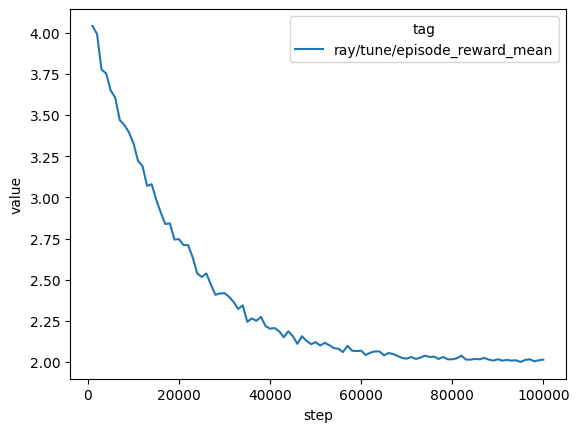

In [20]:
g = sns.lineplot(data=new_df, x='step', y='value', hue='tag')